## 情感分析项目

本项目的目标是基于用户提供的评论，通过算法自动去判断其评论是正面的还是负面的情感。比如给定一个用户的评论：
- 评论1： “我特别喜欢这个电器，我已经用了3个月，一点问题都没有！”
- 评论2： “我从这家淘宝店卖的东西不到一周就开始坏掉了，强烈建议不要买，真实浪费钱”

对于这两个评论，第一个明显是正面的，第二个是负面的。 我们希望搭建一个AI算法能够自动帮我们识别出评论是正面还是负面。

情感分析的应用场景非常丰富，也是NLP技术在不同场景中落地的典范。比如对于一个证券领域，作为股民，其实比较关注舆论的变化，这个时候如果能有一个AI算法自动给网络上的舆论做正负面判断，然后把所有相关的结论再整合，这样我们可以根据这些大众的舆论，辅助做买卖的决策。 另外，在电商领域评论无处不在，而且评论已经成为影响用户购买决策的非常重要的因素，所以如果AI系统能够自动分析其情感，则后续可以做很多有意思的应用。 

情感分析是文本处理领域经典的问题。整个系统一般会包括几个模块：
- 数据的抓取： 通过爬虫的技术去网络抓取相关文本数据
- 数据的清洗/预处理：在本文中一般需要去掉无用的信息，比如各种标签（HTML标签），标点符号，停用词等等
- 把文本信息转换成向量： 这也成为特征工程，文本本身是不能作为模型的输入，只有数字（比如向量）才能成为模型的输入。所以进入模型之前，任何的信号都需要转换成模型可识别的数字信号（数字，向量，矩阵，张量...)
- 选择合适的模型以及合适的评估方法。 对于情感分析来说，这是二分类问题（或者三分类：正面，负面，中性），所以需要采用分类算法比如逻辑回归，朴素贝叶斯，神经网络，SVM等等。另外，我们需要选择合适的评估方法，比如对于一个应用，我们是关注准确率呢，还是关注召回率呢？ 

在本次项目中，我们已经给定了训练数据和测试数据，它们分别是 ``train.positive.txt``, ``train.negative.txt``， ``test_combined.txt``. 请注意训练数据和测试数据的格式不一样，详情请见文件内容。 整个项目你需要完成以下步骤：

数据的读取以及清洗： 从给定的.txt中读取内容，并做一些数据清洗，这里需要做几个工作： 
- （1） 文本的读取，需要把字符串内容读进来。 
- （2）去掉无用的字符比如标点符号，多余的空格，换行符等 
- （3） 把文本转换成``TF-IDF``向量： 这部分直接可以利用sklearn提供的``TfidfVectorizer``类来做。
- （4） 利用逻辑回归等模型来做分类，并通过交叉验证选择最合适的超参数

项目中需要用到的数据：
- ``train.positive.txt``, ``train.negative.txt``， ``test_combined.txt``： 训练和测试数据
- ``stopwords.txt``： 停用词库


你需要完成的部分为标记为`TODO`的部分。 

另外，提交作业时候的注意点：
> 1. 不要试图去创建另外一个.ipynb文件，所有的程序需要在`starter_code.ipynb`里面实现。很多的模块已经帮你写好，不要试图去修改已经定义好的函数以及名字。 当然，自己可以按需求来创建新的函数。但一定要按照给定的框架来写程序，不然判作业的时候会出现很多问题。 
> 2. 上传作业的时候把整个文件解压成.zip文件（不要.rar格式），请不要上传图片文件，其他的都需要上传包括`README.md`。
> 3. 确保程序能够正常运行，我们支持的环境是`Python 3`,  千万不要使用`Python 2`
> 4. 上传前一定要确保完整性，批改过一次的作业我们不会再重新批改，会作为最终的分数来对待。 
> 5. 作业可以讨论，但请自己完成。让我们一起遵守贪心学院的`honor code`。

Reference:

[基于Spark网易云音乐数据分析](https://github.com/20100507/emotional_analysis)  
[预测Yelp美食评分](https://github.com/duoergun0729/nlp/blob/master/%E9%A2%84%E6%B5%8BYelp%E7%BE%8E%E9%A3%9F%E8%AF%84%E5%88%86.md)

### 1. File Reading: 文本读取 
https://blog.csdn.net/u014303046/article/details/82526166   
上面是我们经常看到的按行遍历一个文件方法，你可能已经注意到我在代码中写的if(aLine != '' ):部分。当readline读取到为空的时候，意味着读到了文件的结束。这个时候，问题就在这里，很多人会想，是不是遇到一个空行，也会被认为是文件的结束呢？这就引入了标题的问题。
事实上，文件的空白行并不会返回一个空行。因为在每一行的末尾还有一个或者多个分隔符，因此“空白行”至少会有一个换行符或者系统使用的其他符号。

In [6]:
# train_pos_file train_neg_file 的处理
def train_file(filepath):
    comments = []
    with open(filepath) as fp:
        for line in fp:
            s = line[:1]
            if s == '\n':
                continue
            elif s == '<':
                continue
            elif s == ' ':
                continue
            else:
                line = line.strip() # 去除两边的 空 和 '\n'
                comments.append(line)
    return comments

#initfile()

In [63]:
# test_comb_file 的处理, 需要额外提取 labels
def test_file(filepath):
    comments = []
    labels = []
    with open(filepath) as fp:
        for line in fp:
            s = line[:2]
            if s == '\n':
                continue
            elif s == '<r':
                num = line.find("label")
                label = line[num+7]
                labels.append(label)                
            elif s == '</':
                continue
            elif s == ' ':
                continue
            else:
                line = line.strip() # 去除两边的 空 和 \n
                comments.append(line)
    return comments,labels

# filepath  = "data/test.combined.txt"
# test_comments,test_labels = test_file(filepath)
# print(len(test_labels))
# test_labels = pd.DataFrame(test_labels)
# test_labels.head()

2500


,0
0,0
1,1
2,1
3,1
4,0


In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def process_file():
    """
    读取训练数据和测试数据，并对它们做一些预处理
    """    
    train_pos_file = "data/train.positive.txt" # 7670 == 1
    train_neg_file = "data/train.negative.txt" # 4628 == 0
    test_comb_file = "data/test.combined.txt"
    
    # TODO: 读取文件部分，把具体的内容写入到变量里面
    train_comments = []
    train_labels = []
    test_comments = []
    test_labels = []
    
    train_pos_comments  = train_file(train_pos_file)
    train_pos_num = len(train_pos_comments)
    #print(train_pos_num)
    train_neg_comments  = train_file(train_neg_file)
    train_neg_num = len(train_neg_comments)
    #print(train_pos_num)
    train_labels = np.array([1]*train_pos_num + [0]*train_neg_num) # 正面评价 为 1，负面评价为 0
    train_comments = train_pos_comments + train_neg_comments #12298
    
    test_comments,tets_labels = test_file(test_comb_file)
#     print(len(test_comments))
#     print(len(tets_labels))
    
    return train_comments,train_labels,test_comments,tets_labels
     

train_comments,train_labels,test_comments,tets_labels = process_file()
print(len(train_comments))
print(len(test_comments))
print(len(tets_labels))

12298
2500
2500


In [72]:
train_labels = pd.DataFrame(train_labels,columns=['y'])
train_comments = pd.DataFrame(train_comments,columns=['Text'])

train = pd.concat([train_labels,train_comments],axis=1)
print(len(train))
#train.head()

tets_labels = pd.DataFrame(tets_labels,columns=['y'])
tets_labels['y'] = tets_labels['y'].map({'0':0,'1':1}) # 将string 0,1 映射成 数字 0,1;  one-hot
test_comments = pd.DataFrame(test_comments,columns=['Text'])
test = pd.concat([tets_labels,test_comments],axis=1)
print(len(test))
test.head()

12298
2500


,y,Text
0,0,我终于找到同道中人啦～～～～从初中开始，我就已经喜欢上了michaeljackson.但同学...
1,1,看完已是深夜两点，我却坐在电脑前情难自禁，这是最好的结局。惟有如此，就让那前世今生的纠结就停...
2,1,袁阔成先生是当今评书界的泰斗，十二金钱镖是他的代表作之一
3,1,确实非常不错，物有所值哦
4,0,基本上可以说是诈骗


### 2. Explorary Analysis: 做一些简单的可视化分析

In [73]:
# 训练数据和测试数据大小
print (len(train_comments), len(test_comments))

12298 2500


> 这里有一个假设想验证。我觉得，如果一个评论是负面的，则用户留言时可能会长一些，因为对于负面的评论，用户很可能会把一些细节写得很清楚。但对于正面的评论，用户可能就只写“非常好”，这样的短句。我们想验证这个假设。 为了验证这个假设，打算画两个直方图，分别对正面的评论和负面的评论。 具体的做法是：1. 把正面和负面评论分别收集，之后分别对正面和负面评论画一个直方图。 2.  直方图的X轴是评论的长度，所以从是小到大的顺序。然后Y轴是对于每一个长度，出现了多少个正面或者负面的评论。 通过两个直方图的比较，即可以看出``评论``是否是一个靠谱的特征。


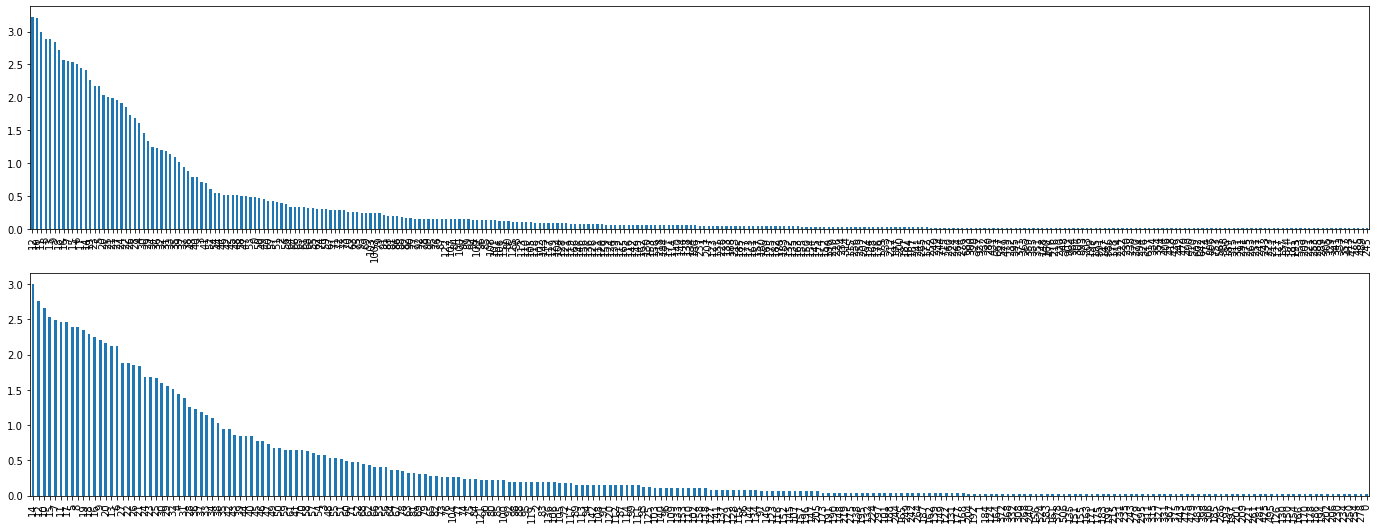

In [150]:
# TODO: 对于训练数据中的正负样本，分别画出一个histogram， histogram的x抽是每一个样本中字符串的长度，y轴是拥有这个长度的样本的百分比。
#       并说出样本长度是否对情感有相关性 (需要先用到结巴分词)
#       参考：https://baike.baidu.com/item/%E7%9B%B4%E6%96%B9%E5%9B%BE/1103834?fr=aladdin
#       画饼状图参考： https://pythonspot.com/matplotlib-histogram/   
#                   https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.hist.html

# pos histogram calculate
pos_num = len(train[train.y == 1])
pos_len = train[train.y == 1].Text.str.len()
pos_counts = pos_len.value_counts()
pos_frequency = pos_counts/pos_counts.sum() * 100

# neg histogram calculate
neg_num = len(train[train.y == 0])
neg_len = train[train.y == 0].Text.str.len()
neg_counts = neg_len.value_counts()
neg_frequency = neg_counts/neg_counts.sum() * 100


#plt.hist(sum) # x y 不对
plt.figure(figsize = (24,9))
plt.subplot(2, 1, 1)
pos_frequency.plot.bar()# rotation=90
plt.subplot(2, 1, 2)
neg_frequency.plot.bar()# rotation=90
plt.xticks(rotation=90)
plt.show()

In [142]:
counts.describe()

count    239.000000
mean      19.364017
std       31.422930
min        1.000000
25%        1.000000
50%        5.000000
75%       20.500000
max      139.000000
Name: Text, dtype: float64

**value_counts(),unique()**  
pd.value_counts()统计不同值的个数，不包括 NaN；unique() 用来展示每个不同的值，包括 NaN/获取Series中元素的唯一值（即去掉重复的）.

// TODO: 情感跟评论长度是否有相关性？

// 你的答案.....有


### 3. 文本预处理
> 在此部分需要做文本预处理方面的工作。 分为几大块：
- ``去掉特殊符号``  比如#$.... 这部分的代码已经给出，不需要自己写
- ``把数字转换成特殊单词`` 把数字转换成 " NUM "， 这部分需要写。 注意：NUM前面和后面加一个空格，这样可以保证之后分词时被分掉。
- ``分词并过滤掉停用词`` 停用词库已经提供，需要读取停用词库，并按照此停用词库做过滤。 停用词库使用给定的文件：``stopwords.txt`` 

In [ ]:
def clean_symbols(text):
    """
    对特殊符号做一些处理，此部分已写好。如果不满意也可以自行改写，不记录分数。
    """
    text = re.sub('[!！]+', "!", text)
    text = re.sub('[?？]+', "?", text)
    text = re.sub("[a-zA-Z#$%&\'()*+,-./:;：<=>@，。★、…【】《》“”‘’[\\]^_`{|}~]+", " OOV ", text)
    return re.sub("\s+", " ", text)  


# TODO：对于train_comments, test_comments进行字符串的处理，几个考虑的点：
#   1. 去掉特殊符号
#   2. 把数字转换成特殊字符或者单词
#   3. 分词并做停用词过滤
#   4. ... （或者其他）
#
#   需要注意的点是，由于评论数据本身很短，如果去掉的太多，很可能字符串长度变成0
#   预处理部分，可以自行选择合适的方.


train_comments_cleaned = [] 
test_comments_cleaned = []

In [ ]:
# 打印一下看看
print (train_comments_cleaned[0], test_comments_cleaned[0])
print (train_comments_cleaned[1], test_comments_cleaned[1])

### 4. 把文本转换成向量
> 预处理好文本之后，我们就需要把它转换成向量形式，这里我们使用tf-idf的方法。 sklearn自带此功能，直接调用即可。输入就是若干个文本，输出就是每个文本的tf-idf向量。详细的使用说明可以在这里找到： 参考：https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html  这里需要特别注意的一点是：对于训练数据调用fit_transform, 也就是训练的过程。 但对于测试数据，不能再做训练，而是直接使用已经训练好的object做transform操作。思考一下为什么要这么做？


In [ ]:
# TODO: 利用tf-idf从文本中提取特征,写到数组里面. 
#       参考：https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

X_train =  # 训练数据的特征
y_train =  # 训练数据的label
X_test =   # 测试数据的特征
y_test =   # 测试数据的label

print (np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test))

### 5. 通过交叉验证来训练模型
> 接下来需要建模了！ 这里我们分别使用逻辑回归，朴素贝叶斯和SVM来训练。针对于每一个方法我们使用交叉验证（gridsearchCV)， 并选出最好的参数组合，然后最后在测试数据上做验证。 这部分已经在第二次作业中讲过。

In [ ]:
from sklearn.linear_model import LogisticRegression
# TODO： 利用逻辑回归来训练模型
#       1. 评估方式： F1-score
#       2. 超参数（hyperparater）的选择利用grid search https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#       3. 打印出在测试数据中的最好的结果（precision, recall, f1-score, 需要分别打印出正负样本，以及综合的）
#       请注意：做交叉验证时绝对不能用测试数据。 测试数据只能用来最后的”一次性“检验。
#       逻辑回归的使用方法请参考：http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
#       对于逻辑回归，经常调整的超参数为： C



In [ ]:
from sklearn.naive_bayes import MultinomialNB
# TODO： 利用朴素贝叶斯来训练模型
#       1. 评估方式： F1-score
#       2. 超参数（hyperparater）的选择利用grid search https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#       3. 打印出在测试数据中的最好的结果（precision, recall, f1-score, 需要分别打印出正负样本，以及综合的）
#       请注意：做交叉验证时绝对不能用测试数据。 测试数据只能用来最后的”一次性“检验。
#       朴素贝叶斯的使用方法请参考：https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB
#       对于朴素贝叶斯，一般不太需要超参数的调节。但如果想调参，也可以参考上面的链接，有几个参数是可以调节的。 




In [ ]:
from sklearn import svm
# TODO： 利用SVM来训练模型
#       1. 评估方式： F1-score
#       2. 超参数（hyperparater）的选择利用grid search https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
#       3. 打印出在测试数据中的最好的结果（precision, recall, f1-score, 需要分别打印出正负样本，以及综合的）
#       请注意：做交叉验证时绝对不能用测试数据。 测试数据只能用来最后的”一次性“检验。
#       SVM的使用方法请参考：http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
#       对于SVM模型，经常调整的超参数为：C, gamma, kernel。 这里的参数C跟逻辑回归是一样的， gamma和kernel是针对于SVM的参数
#       在这里先不要考虑他们的含义（或者通过官方文档试图理解一下）， 在课程最后的部分会讲到这些内容。 



> 对于超参数的调整，我们经常使用gridsearch，这也是工业界最常用的方法，但它的缺点是需要大量的计算，所以近年来这方面的研究也成为了重点。 其中一个比较经典的成果为Bayesian Optimization（利用贝叶斯的思路去寻找最好的超参数）。Ryan P. Adams主导的Bayesian Optimization利用高斯过程作为后验概率（posteior distribution）来寻找最优解。 https://papers.nips.cc/paper/4522-practical-bayesian-optimization-of-machine-learning-algorithms.pdf 在下面的练习中，我们尝试使用Bayesian Optimization工具来去寻找最优的超参数。参考工具：https://github.com/fmfn/BayesianOptimization  感兴趣的朋友可以去研究一下。 

### 6. 思考题 
1. 对于情感分析来说，有一个问题也很重要，比如一个句子里出现了 “我不太兴奋”， “不是很满意”。 在这种情况，因为句子中出现了一些积极的词汇很可能被算法识别成正面的，但由于前面有一个“不”这种关键词，所以否定+肯定=否定，算法中这种情况也需要考虑。另外，否定+否定=肯定， 这种情况也一样。 
2. 另外一个问题是aspect-based sentiment analysis, 这个指的是做情感分析的时候，我们既想了解情感，也想了解特定的方面。 举个例子： “这部手机的电池性能不错，但摄像不够清晰啊!”, 分析完之后可以得到的结论是： “电池：正面， 摄像：负面”， 也就是针对于一个产品的每一个性能做判定，这种问题我们叫做aspect-based sentiment analysis，也是传统情感分析的延伸。

>``Q``: 对于如上两个问题，有什么解决方案？ 大概列一下能想到的处理方案。 用简介的文字来描述即可。  

// 你的答案在这里.......







### 7. 其他领域（仅供参考）
跟情感分析类似的领域有叫affective computing, 也就是用来识别情绪(emotion recognition)。但情感和情绪又不太一样，情绪指的是高兴，低落，失落，兴奋这些人的情绪。我们知道真正的人工智能是需要读懂人类的情绪的。而且情绪识别有很多场景，比如服务机器人根据不同的情绪来跟用户交流； 无人驾驶里通过识别用户的情绪（摄像头或者声音或者传感器）来保证安全驾驶； IOT领域里设备也需要读懂我们的情绪； 微博里通过文本读懂每个人发文时的情绪。 

总体来讲，情绪识别跟情感识别所用到的技术是类似的，感兴趣的小伙伴，也可以关注一下这个领域。 如果想发论文，强烈建议选择情绪方面的，不建议选择情感分析，因为问题太老了。情绪分析是近几年才开始受关注的领域。 